In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
matplotlib.rcParams['figure.figsize'] = (10, 6.66)

In [4]:
df_dir = {}

In [5]:
as_number = '13129'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        exec(df_id + '_df = pd.read_csv(' + '"arrival_rate_data/' + run_id + '/timeslot_data.csv' + '", index_col="timeslot")' )
        exec('df_dir["' + df_id + '"] = ' + df_id + '_df')
        df_dir[df_id]['Optimizer'] = opt_name[opt]
        df_dir[df_id]['Arrival Rate'] = arrival_rate
        df_dir[df_id]['Carbon Footprint'] = df_dir[df_id]['carbon_footprint'] / df_dir[df_id]['acceptance_ratio']
        df_dir[df_id]['Renewable Energy'] = (df_dir[df_id]['green_energy'] / (df_dir[df_id]['green_energy'] + df_dir[df_id]['brown_energy'])) / df_dir[df_id]['acceptance_ratio']
        print(df_id)

c_13129_0_01_3600
c_13129_0_02_3600
c_13129_0_03_3600
c_13129_0_04_3600
c_13129_0_05_3600
c_13129_0_06_3600
c_13129_0_07_3600
c_13129_0_08_3600
c_13129_0_09_3600
c_13129_0_10_3600
t_13129_0_01_3600
t_13129_0_02_3600
t_13129_0_03_3600
t_13129_0_04_3600
t_13129_0_05_3600
t_13129_0_06_3600
t_13129_0_07_3600
t_13129_0_08_3600
t_13129_0_09_3600
t_13129_0_10_3600
f_13129_0_01_3600
f_13129_0_02_3600
f_13129_0_03_3600
f_13129_0_04_3600
f_13129_0_05_3600
f_13129_0_06_3600
f_13129_0_07_3600
f_13129_0_08_3600
f_13129_0_09_3600
f_13129_0_10_3600


In [6]:
ar_df = pd.concat(list(df_dir.values()), axis=0)

In [7]:
ar_df.columns

Index(['carbon_footprint', 'brown_energy', 'green_energy', 'acceptance_ratio',
       'migration_count', 'ps_min', 'ps_5th', 'ps_mean', 'ps_95th', 'ps_max',
       'Optimizer', 'Arrival Rate', 'Carbon Footprint', 'Renewable Energy'],
      dtype='object')

In [11]:
ar_df.head()

,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max,Optimizer,Arrival Rate,Carbon Footprint,Renewable Energy
timeslot,,,,,,,,,,,,,,
0,0.000,0.000,0.000,5.387205,0,15.0,15.0,24.062500,36.50,38.0,Optimal,0.08,0.000000,NaN
1,26.300,21.132,12.537,4.560811,0,14.0,15.5,23.909091,29.50,30.0,Optimal,0.08,5.766519,0.081643
2,41.894,36.425,27.500,3.941441,0,17.0,18.4,25.000000,31.95,33.0,Optimal,0.08,10.629106,0.109146
3,35.120,29.905,16.200,3.706897,0,15.0,15.7,22.250000,29.00,29.0,Optimal,0.08,9.474233,0.094789
4,41.411,36.480,14.862,3.477051,0,17.0,17.3,26.285714,39.20,41.0,Optimal,0.08,11.909804,0.083252


In [12]:
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 30
Data columns (total 14 columns):
carbon_footprint    927 non-null float64
brown_energy        927 non-null float64
green_energy        927 non-null float64
acceptance_ratio    927 non-null float64
migration_count     927 non-null int64
ps_min              927 non-null float64
ps_5th              927 non-null float64
ps_mean             927 non-null float64
ps_95th             927 non-null float64
ps_max              927 non-null float64
Optimizer           927 non-null object
Arrival Rate        927 non-null object
Carbon Footprint    927 non-null float64
Renewable Energy    864 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 108.6+ KB


In [13]:
ar_df.dropna(inplace=True)

In [14]:
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1 to 29
Data columns (total 14 columns):
carbon_footprint    864 non-null float64
brown_energy        864 non-null float64
green_energy        864 non-null float64
acceptance_ratio    864 non-null float64
migration_count     864 non-null int64
ps_min              864 non-null float64
ps_5th              864 non-null float64
ps_mean             864 non-null float64
ps_95th             864 non-null float64
ps_max              864 non-null float64
Optimizer           864 non-null object
Arrival Rate        864 non-null object
Carbon Footprint    864 non-null float64
Renewable Energy    864 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 101.2+ KB


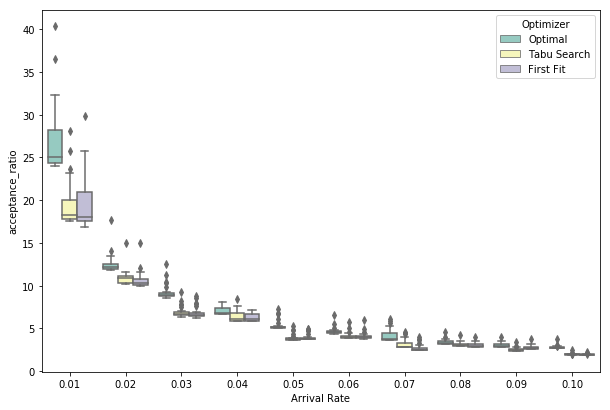

In [27]:
ax = sns.boxplot(x="Arrival Rate", y="acceptance_ratio", hue="Optimizer", data=ar_df, palette="Set3")

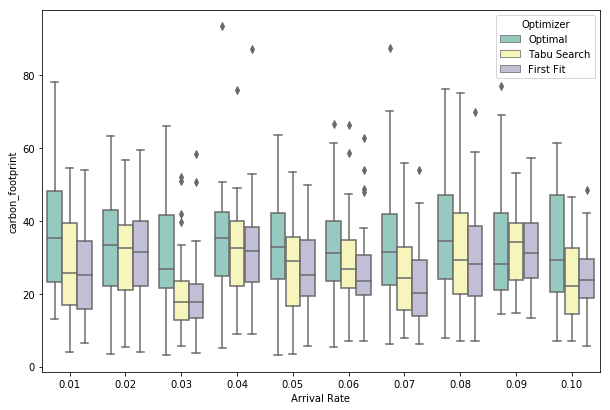

In [32]:
ax = sns.boxplot(x="Arrival Rate", y="carbon_footprint", hue="Optimizer", data=ar_df, palette="Set3")

[Text(0, 0.5, 'Carbon Footprint / acceptance_ratio')]

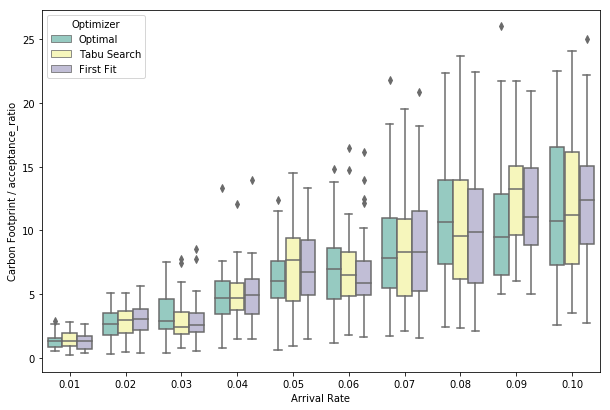

In [31]:
ax = sns.boxplot(x="Arrival Rate", y="Carbon Footprint", hue="Optimizer", data=ar_df, palette="Set3")
ax.set(ylabel='Carbon Footprint / acceptance_ratio')

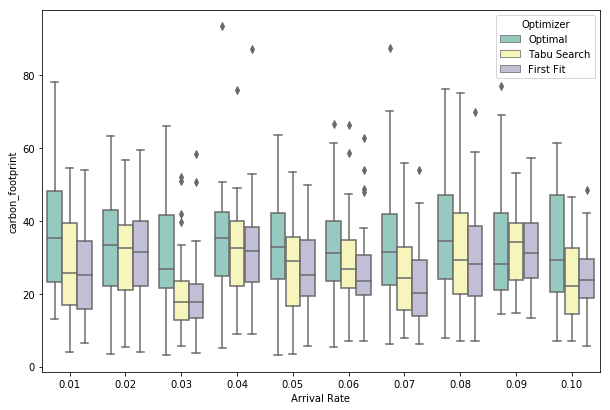